<a href="https://colab.research.google.com/github/CaptainLento/Optimization/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Useful starting lines
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine
# Loads sklearn's Breast Cancer dataset
dataset = load_wine()

# Prendo i dati utili
Alcohol = dataset.data[:,0]
print(Alcohol, end='\n')
Malic_Acid = dataset.data[:,1]
print(Malic_Acid, end='\n')
Ash = dataset.data[:,2]
print(Ash, end='\n')
Magnesium = dataset.data[:,4]
print(Magnesium, end='\n')

# Filtro IQT
def IQR(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    x = x[(x >= lower_limit) & (x <= upper_limit)]
    return x

# Fenoli tossici per l'umano
Phenols = dataset.data[:,5]

def standardize(x):
    """Standardize the original data points (mean 0 and std dev 1)."""
    x = x - np.mean(x)
    x = x / np.std(x)
    return x

def build_model_data(x, y):
    """Get regression data in matrix form."""
    b = y
    num_samples = len(b)
    A = np.c_[np.ones(num_samples), x]
    return A, b

# Use as datapoints the first and third columns
Ash = dataset.data[:,2]
Phenols = dataset.data[:,5]
A, b = build_model_data(standardize(Phenols), standardize(Ash))

[14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 14.06 12.93 13.71 12.85
 13.5  13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48
 13.28 13.05 13.07 14.22 13.56 13.41 13.88 13.24 13.05 14.21 14.38 13.9
 14.1  13.94 13.05 13.83 13.82 13.77 13.74 13.56 14.22 13.29 13.72 12.37
 12.33 12.64 13.67 12.37 12.17 12.37 13.11 12.37 13.34 12.21 12.29 13.86
 13.49 12.99 11.96 11.66 13.03 11.84 12.33 12.7  12.   12.72 12.08 13.05
 11.84 12.67 12.16 11.65 11.64 12.08 12.08 12.   12.69 12.29 11.62 12.47
 11.81 12.29 12.37 12.29 12.08 12.6  12.34 11.82 12.51 12.42 12.25 12.72
 12.22 11.61 11.46 12.52 11.76 11.41 12.08 11.03 11.82 12.42 12.77 12.
 11.45 11.56 12.42 13.05 11.87 12.07 12.43 11.79 12.37 12.04 12.86 12.88
 12.81 12.7  12.51 12.6  12.25 12.53 13.49 12.84 12.93 13.36 13.52 13.62
 12.25 13.16 13.88 12.87 13.32 13.08 13.5  12.79 13.11 13.23 12.58 13.17
 13.84 12.45 14.34 13.48 12.36 13.69 12.85 12.96 13.78

Number of samples n =  178
Dimension of each sample d =  2


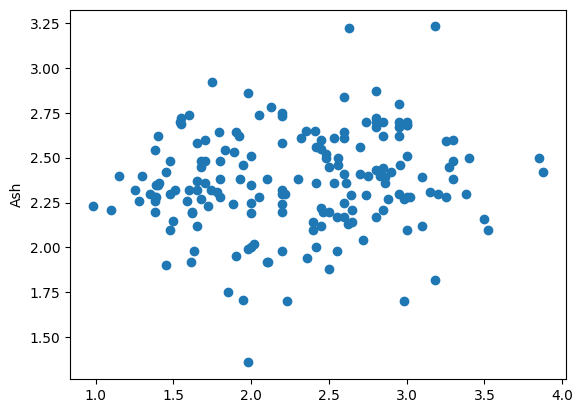

In [ ]:
# Take a look at our data
plt.ylabel ('Phenols')
plt.ylabel ('Ash')

plt.scatter(Phenols, Ash)
print('Number of samples n = ', b.shape[0])
print('Dimension of each sample d = ', A.shape[1])